### import the libraries.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Read the file and extract the dataset.

In [2]:
dataset=pd.read_csv(r"C:\Users\sudee\Downloads\Copy of loan - loan.csv")

### Make a copy of the dataset for the analysis and modelling.

In [3]:
df=dataset.copy()
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


### Checking the basics.

In [4]:
df.shape

(614, 13)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


### Checking the null values.

In [6]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

### Imputing  the null values with mode and mean.

In [7]:
df['Gender'].fillna(df['Gender'].mode()[0],inplace=True)
df['Married'].fillna(df['Married'].mode()[0],inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0],inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0],inplace=True)


In [8]:
df['LoanAmount'].fillna(df['LoanAmount'].mean(),inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean(),inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0],inplace=True)


In [9]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

we don't need the 'Loan_ID' column for analysis so drop that column

In [10]:
df.drop('Loan_ID',axis=1,inplace=True)

In [11]:
df.select_dtypes(include='object')

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,Urban,Y
1,Male,Yes,1,Graduate,No,Rural,N
2,Male,Yes,0,Graduate,Yes,Urban,Y
3,Male,Yes,0,Not Graduate,No,Urban,Y
4,Male,No,0,Graduate,No,Urban,Y
...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,Rural,Y
610,Male,Yes,3+,Graduate,No,Rural,Y
611,Male,Yes,1,Graduate,No,Urban,Y
612,Male,Yes,2,Graduate,No,Urban,Y


### Converting the categorical variable to numerical.

In [12]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()

In [13]:
for col in df.select_dtypes(include='object'):
    df[col]=lb.fit_transform(df[col])

In [14]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1


### Creating a new column 'Total_Income' by adding 'ApplicantIncome' and 'CoapplicantIncome'.

In [15]:
df['Total_Income']=df['ApplicantIncome']+df['CoapplicantIncome']

In [16]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1,5849.0
1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0,6091.0
2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1,3000.0
3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1,4941.0
4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1,6000.0


### Finding outliers and transforming them.

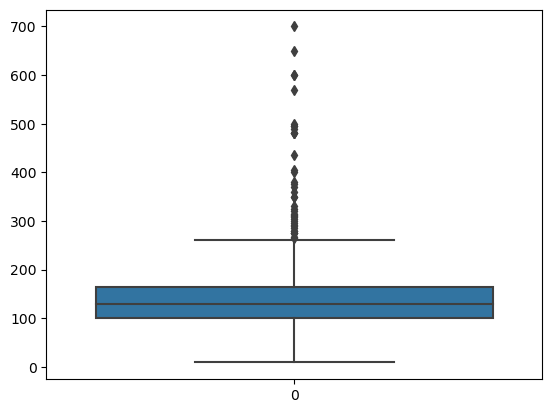

In [17]:
sns.boxplot(df['LoanAmount'])
plt.show()

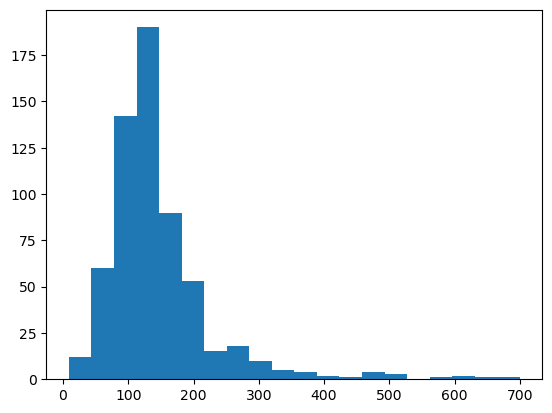

In [18]:
plt.hist(df['LoanAmount'],bins=20)
plt.show()

In [19]:
from sklearn.preprocessing import FunctionTransformer

In [20]:
ft=FunctionTransformer(np.log1p)

In [21]:
df['LoanAmount']=ft.fit_transform(df[['LoanAmount']])

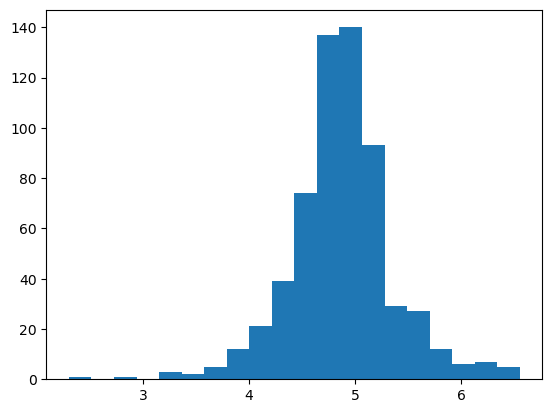

In [22]:
plt.hist(df['LoanAmount'],bins=20)
plt.show()

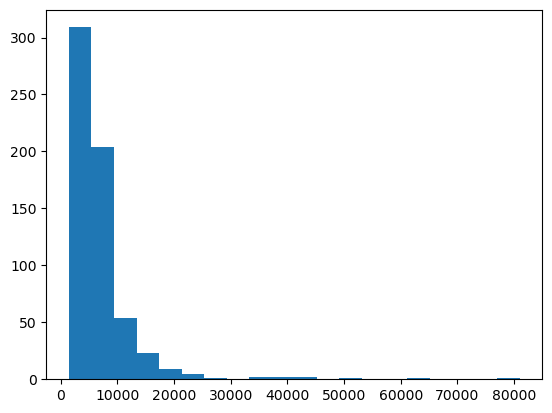

In [23]:
plt.hist(df['Total_Income'],bins=20)
plt.show()

In [24]:
df['Total_Income']=ft.fit_transform(df[['Total_Income']])

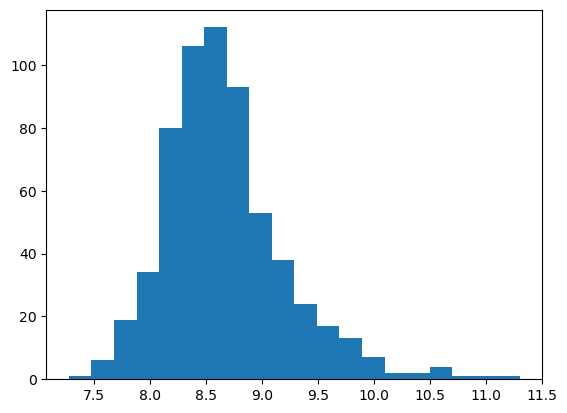

In [25]:
plt.hist(df['Total_Income'],bins=20)
plt.show()

### Selecting the dependent and independent variables.

In [26]:
X=df.drop(['ApplicantIncome','CoapplicantIncome','Loan_Status'],axis=1)

In [27]:
X.head()

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Total_Income
0,1,0,0,0,0,4.993232,360.0,1.0,2,8.674197
1,1,1,1,0,0,4.859812,360.0,1.0,0,8.714732
2,1,1,0,0,1,4.204693,360.0,1.0,2,8.006701
3,1,1,0,1,0,4.795791,360.0,1.0,2,8.505525
4,1,0,0,0,0,4.955827,360.0,1.0,2,8.699681


In [28]:
y=df[['Loan_Status']]

In [29]:
y.head()

,Loan_Status
0,1
1,0
2,1
3,1
4,1


### Splitting the dataset into train and test dataset.

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=1)

### Standardizing the independent variables.

In [32]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()

In [33]:
X_train=ss.fit_transform(X_train)

In [34]:
X_test=ss.fit_transform(X_test)

### Selecting the Regression Algorithm(LogsiticRegression).

In [35]:
from sklearn.linear_model import LogisticRegression
LR=LogisticRegression()

In [36]:
LR

LogisticRegression()

In [37]:
LR.fit(X_train,y_train)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

#### Predict the X_test.

In [38]:
y_predict=LR.predict(X_test)

In [39]:
y_predict

array([1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1])

#### Finding accuracy score and creating confusion matrics,classification matrics.

In [40]:
from sklearn import metrics

In [41]:
accuracy=metrics.accuracy_score(y_predict,y_test)
accuracy

0.7891891891891892

In [61]:
confusion_matrix=metrics.confusion_matrix(y_predict,y_test)
confusion_matrix

array([[ 24,   2],
       [ 37, 122]], dtype=int64)

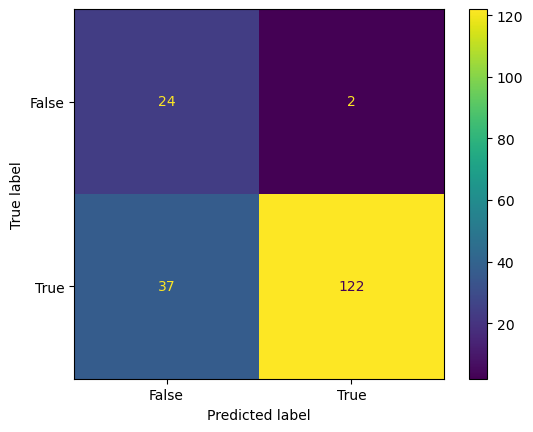

In [62]:
cm=metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix,display_labels=[False,True])
cm.plot()
plt.show()

In [60]:
print(metrics.classification_report(y_predict,y_test))

              precision    recall  f1-score   support

           0       0.39      0.92      0.55        26
           1       0.98      0.77      0.86       159

    accuracy                           0.79       185
   macro avg       0.69      0.85      0.71       185
weighted avg       0.90      0.79      0.82       185



#### Predicting Loan status without Loan_status Label using previoulsy created model.

In [42]:
test=dataset.drop(['Loan_Status','Loan_ID'],axis=1)

In [43]:
test.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban


In [44]:
test.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
dtype: int64

In [45]:
test['Gender'].fillna(test['Gender'].mode()[0],inplace=True)
test['Married'].fillna(test['Married'].mode()[0],inplace=True)
test['Dependents'].fillna(test['Dependents'].mode()[0],inplace=True)
test['Self_Employed'].fillna(test['Self_Employed'].mode()[0],inplace=True)

In [46]:
test['LoanAmount'].fillna(test['LoanAmount'].mean(),inplace=True)
test['Loan_Amount_Term'].fillna(test['Loan_Amount_Term'].mean(),inplace=True)
test['Credit_History'].fillna(test['Credit_History'].mode()[0],inplace=True)

In [47]:
test.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [48]:
for col in test.select_dtypes(include='object'):
    test[col]=lb.fit_transform(test[col])

In [49]:
test['tot_income']=test['ApplicantIncome']+test['CoapplicantIncome']

In [50]:
test=test.drop(['ApplicantIncome','CoapplicantIncome'],axis=1)

In [51]:
test['tot_income']=ft.fit_transform(test[['tot_income']])

In [52]:
test['LoanAmount']=ft.fit_transform(test[['tot_income']])

In [53]:
test=ss.fit_transform(test)

In [54]:
test

array([[ 0.47234264, -1.37208932, -0.73780632, ...,  0.41173269,
         1.22329839,  0.00842583],
       [ 0.47234264,  0.72881553,  0.25346957, ...,  0.41173269,
        -1.31851281,  0.08285992],
       [ 0.47234264,  0.72881553, -0.73780632, ...,  0.41173269,
         1.22329839, -1.21729867],
       ...,
       [ 0.47234264,  0.72881553,  0.25346957, ...,  0.41173269,
         1.22329839,  0.65366363],
       [ 0.47234264,  0.72881553,  1.24474546, ...,  0.41173269,
         1.22329839,  0.48512821],
       [-2.11710719, -1.37208932, -0.73780632, ..., -2.42876026,
        -0.04760721, -0.43939259]])

In [56]:
predict=LR.predict(test)

In [57]:
predict

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0,